Let's do a data analysis of the iris dataset and see what we can find out

## Importing Libraries

Let's load the libraries necessary for analyzing data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

Let's load the Iris dataset

In [4]:
df = pd.read_csv("./datasets/iris/iris.data", header=None)
df.columns = [
    'Sepal Length (in cm)',
    'Sepal Width (in cm)',
    'Petal Length (in cm)',
    'Petal Width (in cm)',
    'Class'
]
df.head()

,Sepal Length (in cm),Sepal Width (in cm),Petal Length (in cm),Petal Width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's take a look at the data more in depth with some basic descriptive statistics

In [5]:
df.describe(include='all')

,Sepal Length (in cm),Sepal Width (in cm),Petal Length (in cm),Petal Width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sepal Length (in cm)  150 non-null    float64
 1   Sepal Width (in cm)   150 non-null    float64
 2   Petal Length (in cm)  150 non-null    float64
 3   Petal Width (in cm)   150 non-null    float64
 4   Class                 150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

Sepal Length (in cm)    0
Sepal Width (in cm)     0
Petal Length (in cm)    0
Petal Width (in cm)     0
Class                   0
dtype: int64

We don't have to worry about handling any missing values. Is there any feature engineering we can do? Just by looking at the data, there doesn't seem to be anything that's jumping out other than maybe Sepal and Petal areas, though that would assume either square or rectangular sepals and petals, so let's just not do that.

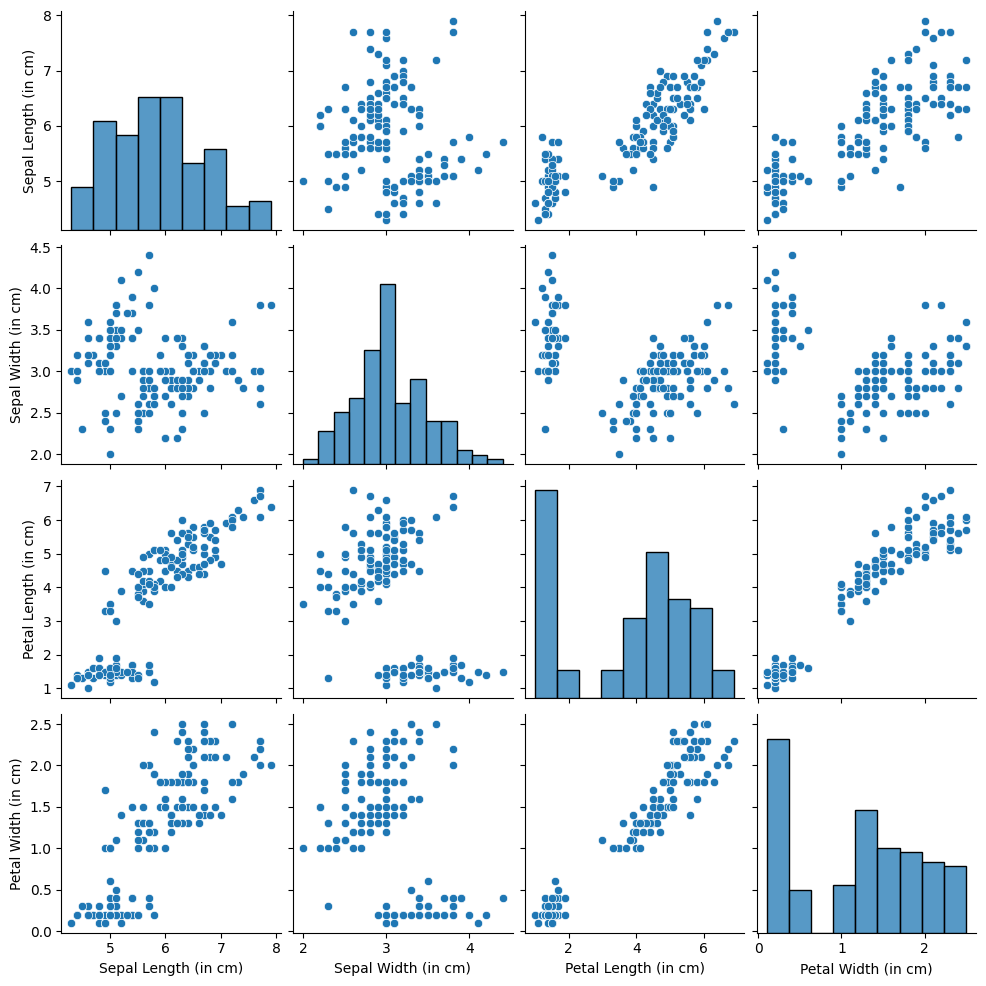

In [8]:
sns.pairplot(df)

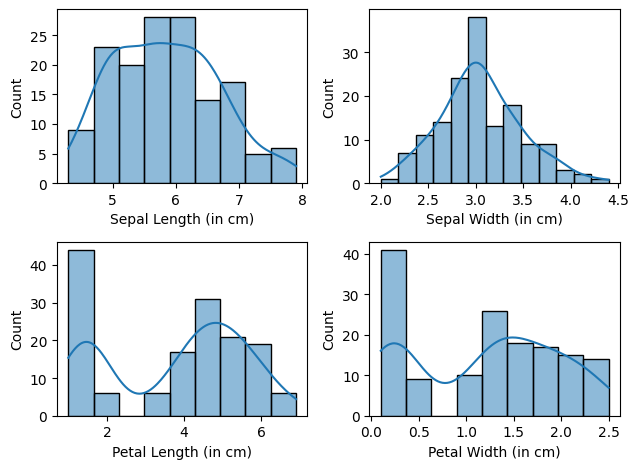

In [9]:
from scipy.stats import norm, boxcox, yeojohnson

fig, ax = plt.subplots(nrows=int(np.ceil(df.select_dtypes(include='number').shape[1]) / 2), ncols=2)

for i, (column, axis) in enumerate(zip(df.select_dtypes(include=['number']), ax.flatten())):
    curr_col = df[column]
    sns.histplot(curr_col, ax=axis, kde=True)

plt.tight_layout()

plt.show()

Let's take a look at the categorical variable of class and see how it varies depending on different numerical characteristics.

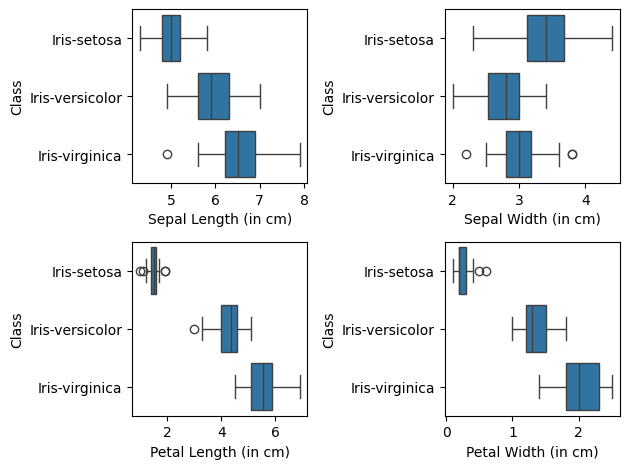

In [35]:
numeric_columns = df.select_dtypes(include='number').columns

fig, ax = plt.subplots(nrows=int( np.ceil( len(numeric_columns) / 2) ), ncols=2)

for (column, axis) in zip(numeric_columns, ax.flatten()):
    sns.boxplot(data=df, x=column, y='Class', ax=axis)


plt.tight_layout()

plt.show()

We can see here that for sepal length, petal length and petal width the values on the x axis generally increase from iris setosa to iris versicolor to iris virginica. This tells us a lot about our classes, as we can see that:
    <ol>
        <li>iris setosa have short and fat sepals</li>
        <li>iris setosa have short and thin petals</li>
        <li>iris versicolor have mid sized petals, with small mid sized sepals</li>
        <li>iris virginica have large petals, with medium to large sized sepals</li>
    </ol>

/var/folders/sx/d911c39d727cq7v_gq3fs9200000gn/T/ipykernel_2109/3781553707.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdBu")


<Axes: >

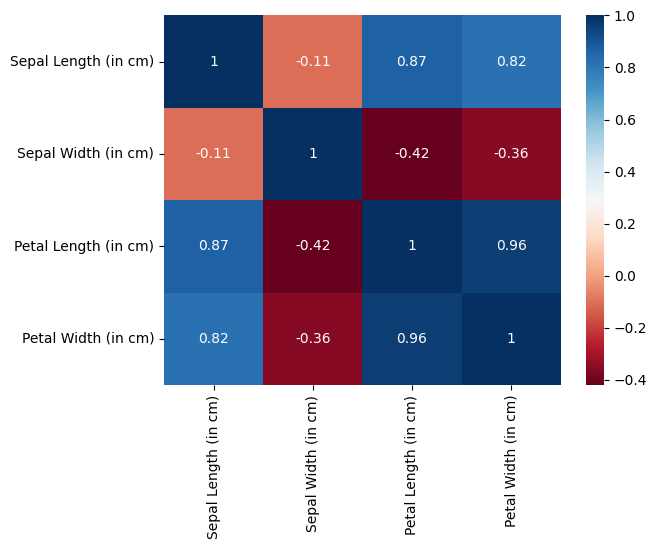

In [10]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

We can see that there are high levels of correlation among the numeric variables, with petal length and petal width being extremely positively correlated at .96, sepal length and petal length being stronly positively correlated at .87 and sepal length and petal width being stronly positively correlated at .82. There are moderately strong negative correlations in petal length and sepal width and petal width and sepal width at -.42 and -.36 respectively. The strong positively correlated variables may indicate multicolinearity, so let's compute the variance inflation factor to see if we should do something about that.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include='number')), columns=df.columns[:-1])

# Add a constant term for intercept (required for statsmodels)
df_scaled['const'] = 1

# df_scaled.drop(columns='Petal Length (in cm)', axis=1, inplace=True)

vif_data = pd.DataFrame()
vif_data['Variable'] = df_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

vif_data.head()

,Variable,VIF
0,Sepal Length (in cm),7.103113
1,Sepal Width (in cm),2.099039
2,Petal Length (in cm),31.397292
3,Petal Width (in cm),16.141564
4,const,1.000000


We can see that the variance inflation factor is highest for petal length at 31.397, with petal width coming in at second highest at 16.14. Let's see how these values are affected by removing variables with high VIF.

In [19]:
def create_vif_dataframe(df):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [20]:
df_scaled_no_petal_length = df_scaled.drop(columns='Petal Length (in cm)', axis=1)
vif_no_petal_length = create_vif_dataframe(df_scaled_no_petal_length)
vif_no_petal_length.head()

,Variable,VIF
0,Sepal Length (in cm),3.414225
1,Sepal Width (in cm),1.294507
2,Petal Width (in cm),3.864678
3,const,1.000000


In [21]:
df_scaled_no_petal_width = df_scaled.drop(columns='Petal Width (in cm)', axis=1)
vif_no_petal_width = create_vif_dataframe(df_scaled_no_petal_width)
vif_no_petal_width.head()

,Variable,VIF
0,Sepal Length (in cm),6.262873
1,Sepal Width (in cm),1.826325
2,Petal Length (in cm),7.517265
3,const,1.000000


We can see that getting rid of petal length reduces the VIF for the other variables greather than does removing the petal width. Let's keep these variables for now and compare how the models are affected by removing or keeping these variables.

Now that we've gotten to know our data a bit, let's try to model it and see how we do

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def split_data(X, y, train_test_split_kws):
    return train_test_split(X, y, **train_test_split_kws)

def model_evaluation(X, y, split_data_kws, logreg_kws, cross_val_score_kws):
    x_train, x_test, y_train, y_test = split_data(X, y, split_data_kws)

    model = LogisticRegression(**logreg_kws)
    model.fit(x_train, y_train)

    cv_scores = cross_val_score(model, x_train, y_train, **cross_val_score_kws)

    y_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    return model, cv_scores, test_accuracy

In [182]:
def create_grouped_bar_chart(x_labels, y_label, bar_values_dict):
    x = np.arange(len(x_labels)) # the label locations
    width = 0.25 # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in bar_values_dict.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, [float("{:.2f}".format(num)) for num in measurement], width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel(y_label)
    ax.set_xticks(x + width, x_labels)
    ax.legend(loc='lower center', ncols=len(bar_values_dict))

    return fig, ax

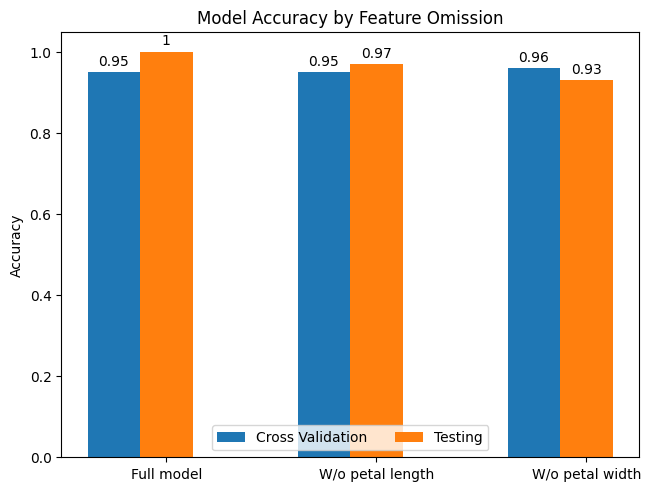

In [201]:
split_data_kws = {'test_size': 0.2,}

logreg_kws = {'solver': 'lbfgs', 'multi_class': 'auto', 'max_iter': 1000,}

cross_val_score_kws = {'cv': 10, 'scoring': 'accuracy'}

X = df[['Petal Length (in cm)', 'Petal Width (in cm)', 'Sepal Length (in cm)', 'Sepal Width (in cm)']]
y = df['Class']
full_model_info = model_evaluation(X, y, split_data_kws, logreg_kws, cross_val_score_kws)

X_without_petal_length = X.drop(columns='Petal Length (in cm)', axis=1)
model_wo_petal_length_info = model_evaluation(X_without_petal_length, y, split_data_kws, logreg_kws, cross_val_score_kws)

X_without_petal_width = X.drop(columns='Petal Width (in cm)', axis=1)
model_wo_petal_width_info = model_evaluation(X_without_petal_width, y, split_data_kws, logreg_kws, cross_val_score_kws)

x_labels = ['Full model', 'W/o petal length', 'W/o petal width']
y_label = 'Accuracy'

bar_values_dict = {
    'Cross Validation': [full_model_info[1].mean(), model_wo_petal_length_info[1].mean(), model_wo_petal_width_info[1].mean()],
    'Testing': [full_model_info[2], model_wo_petal_length_info[2], model_wo_petal_width_info[2]]
}

fig, ax = create_grouped_bar_chart(x_labels, y_label, bar_values_dict)

ax.set_title("Model Accuracy by Feature Omission")

plt.show()


We can see that the models here are relatively similar, meaning we lose little to no information when removing variables with a high variance inflation factor.